In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("cancer.csv")
data.shape

(569, 33)

In [ ]:
y = data[["diagnosis"]]

In [ ]:
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.isna().sum()

# If we have null values then impute them first.

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
principalCA = PCA(n_components=3)

In [ ]:
principalCA.fit(X)

PCA(n_components=3)

In [ ]:
for ids, i in enumerate(principalCA.explained_variance_ratio_):
    print(f"PC-{ids+1} = {np.around(i,3)*100}%")

PCA-1 = 98.2%
PCA-2 = 1.6%
PCA-3 = 0.2%


In [ ]:
reducedDF = pd.DataFrame(principalCA.transform(X), columns=["PC1", "PC2", "PC3"])

In [ ]:
reducedDF.head()

,PC1,PC2,PC3
0,1160.142574,-293.917544,48.578398
1,1269.122443,15.630182,-35.394534
2,995.793889,39.156743,-1.709753
3,-407.180803,-67.380320,8.672848
4,930.341180,189.340742,1.374801


/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


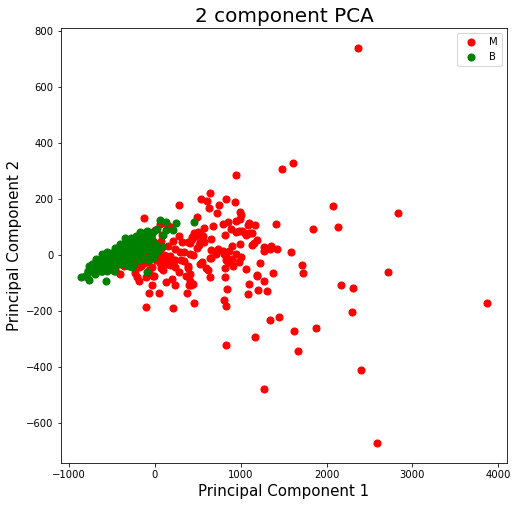

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['diagnosis'] == target
    ax.scatter(reducedDF.loc[indicesToKeep, 'PC1']
               , reducedDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

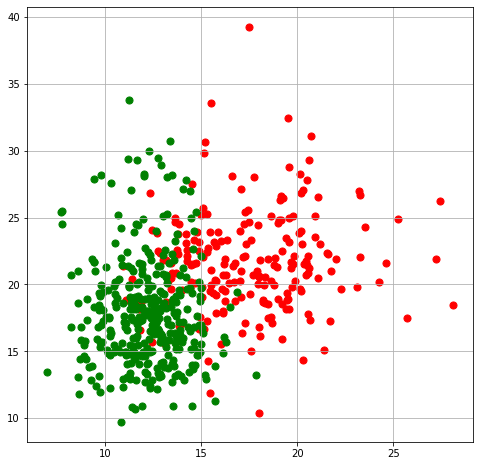

In [ ]:
fig = plt.figure(figsize = (8,8))
ax2 = fig.add_subplot(1,1,1) 
for target, color in zip(targets,colors):
    indicesToKeep = data['diagnosis'] == target
    ax2.scatter(data.loc[indicesToKeep, 'radius_mean']
               , data.loc[indicesToKeep, 'texture_mean']
               , c = color
               , s = 50)
ax2.grid()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reducedDF, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y_train = y_train.apply(le.fit_transform)

In [ ]:
rf.fit(X_train, y_train)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
y_test = y_test.apply(le.fit_transform)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print(accuracy_score(predictions, y_test))
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))

0.9824561403508771
1.0
0.9444444444444444
0.9714285714285714
